In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import ax_default

In [9]:
cost_cum = [1, 2, 3, 4 ,5 ,6, 7, 1, 1, 0.5, 0.25]
cost_cum = np.cumsum(cost_cum)
cost_alloc = {'Cathode': {'(0,)': 1, '(1,)': 2}, 'Thruster': {'(0, 0)': 3, '(0, 1)': 5, '(1, 0)': 6, '(1, 1)': 1, '(1, 2)': 1, '(2, 1)': 0.5, '(2, 2)': 0.25}, 'Plume': {'(0,)': 4, '(1,)': 7}}

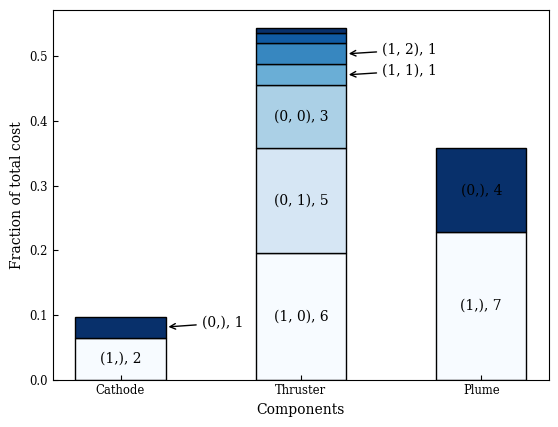

In [23]:
# Bar chart showing cost allocation breakdown
fig, ax = plt.subplots()
width = 0.5
x = np.arange(len(cost_alloc))
xlabels = list(cost_alloc.keys())
cmap = plt.get_cmap('Blues')
for j, (node, alpha_dict) in enumerate(cost_alloc.items()):
    bottom = 0
    c_intervals = np.linspace(0, 1, len(alpha_dict))
    bars = [(alpha, cost, cost / cost_cum[-1]) for alpha, cost in alpha_dict.items()]
    bars = sorted(bars, key=lambda ele: ele[2], reverse=True)
    for i, (alpha, cost, frac) in enumerate(bars):
        p = ax.bar(x[j], frac, width, color=cmap(c_intervals[i]), linewidth=1, edgecolor=[0, 0, 0],
               bottom=bottom)
        bottom += frac
        if cost > 1:
            # Label large bars right on the center of the bar
            ax.bar_label(p, labels=[f'{alpha}, {round(cost)}'], label_type='center')
        elif cost > 0.5:
            # Label smaller bars with a text off to the side
            xy = (x[j] + width/2, bottom - frac/2)
            ax.annotate(f'{alpha}, {round(cost)}', xy, xytext=(xy[0] + 0.2, xy[1]), arrowprops={'arrowstyle': '->', 'linewidth': 1})
        # else:
        #     pass  # Don't label any bar that is smaller than this
            
ax_default(ax, "Components", "Fraction of total cost", legend=False)
ax.set_xticks(x, xlabels)
plt.show()